# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [102]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [103]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | leer
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | ballina
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 1 | araripe
Processing Record 11 of Set 1 | kifri
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | gettorf
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | machico

Processing Record 42 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 43 of Set 4 | paracuru
Processing Record 44 of Set 4 | cockburn town
Processing Record 45 of Set 4 | kasongo-lunda
Processing Record 46 of Set 4 | hami
Processing Record 47 of Set 4 | nuku'alofa
Processing Record 48 of Set 4 | khash
Processing Record 49 of Set 4 | kayangel
Processing Record 0 of Set 5 | romorantin-lanthenay
Processing Record 1 of Set 5 | guangming
Processing Record 2 of Set 5 | port saint john's
Processing Record 3 of Set 5 | minab
Processing Record 4 of Set 5 | chibougamau
Processing Record 5 of Set 5 | kulia village
City not found. Skipping...
Processing Record 6 of Set 5 | mugia
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | ataq
Processing Record 9 of Set 5 | undurkhaan
Processing Record 10 of Set 5 | fisterra
Processing Record 11 of Set 5 | cao lanh
Processing Record 12 of Set 5 | daru
Processing Record 13 of Set 5 | lionel town
Processing Record 14 o

Processing Record 35 of Set 8 | north platte
Processing Record 36 of Set 8 | ulsteinvik
Processing Record 37 of Set 8 | prince george
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | valle de la pascua
Processing Record 40 of Set 8 | sungailiat
Processing Record 41 of Set 8 | scarborough
Processing Record 42 of Set 8 | patterson
Processing Record 43 of Set 8 | ajuchitlan
Processing Record 44 of Set 8 | mollendo
Processing Record 45 of Set 8 | bushland beach
City not found. Skipping...
Processing Record 46 of Set 8 | rikaze
Processing Record 47 of Set 8 | arraial do cabo
Processing Record 48 of Set 8 | asbury lake
Processing Record 49 of Set 8 | new norfolk
Processing Record 0 of Set 9 | sterling
Processing Record 1 of Set 9 | urengoy
Processing Record 2 of Set 9 | remire-montjoly
Processing Record 3 of Set 9 | mont-tremblant
Processing Record 4 of Set 9 | berdigestyakh
Processing Record 5 of Set 9 | lillehammer
Processing Record 6 of Set 9 | boguchany
Proc

In [104]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [105]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-0.05,99,100,1.94,SJ,1702347208
1,puerto ayora,-0.7393,-90.3518,24.17,86,10,2.85,EC,1702347208
2,leer,53.2316,7.4610,7.19,92,90,3.48,DE,1702347208
3,saint-joseph,-21.3667,55.6167,23.21,76,41,3.70,RE,1702347208
4,ballina,-28.8667,153.5667,28.77,57,65,3.54,AU,1702347208


In [106]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [107]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-0.05,99,100,1.94,SJ,1702347208
1,puerto ayora,-0.7393,-90.3518,24.17,86,10,2.85,EC,1702347208
2,leer,53.2316,7.4610,7.19,92,90,3.48,DE,1702347208
3,saint-joseph,-21.3667,55.6167,23.21,76,41,3.70,RE,1702347208
4,ballina,-28.8667,153.5667,28.77,57,65,3.54,AU,1702347208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

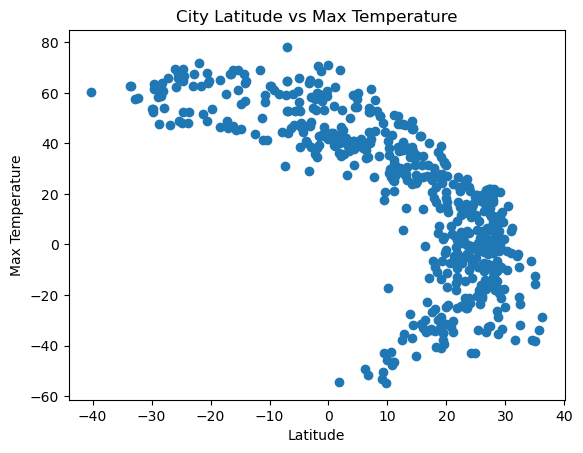

In [108]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

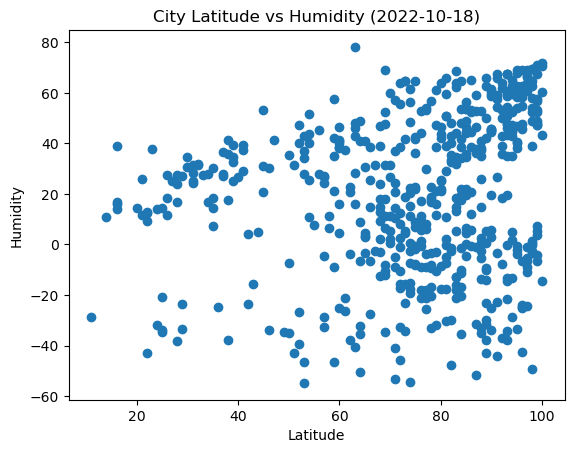

In [109]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

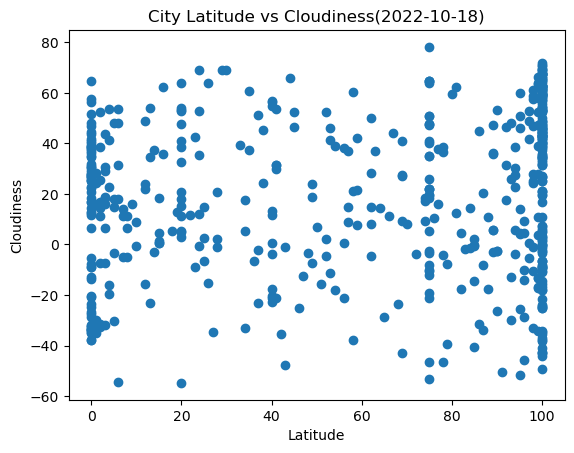

In [110]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness(2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

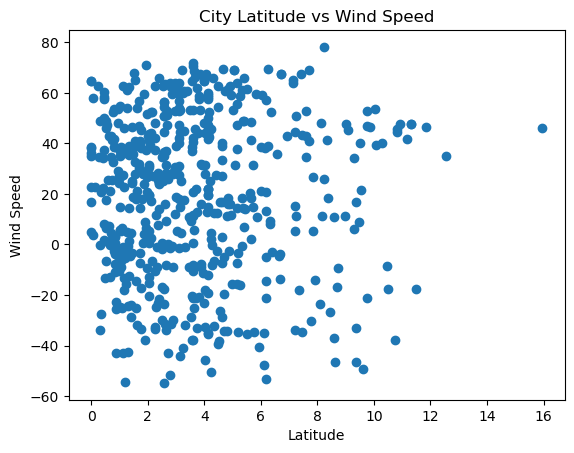

In [111]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [112]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-0.05,99,100,1.94,SJ,1702347208
2,leer,53.2316,7.4610,7.19,92,90,3.48,DE,1702347208
8,kifri,34.6959,44.9661,19.05,30,100,2.52,IQ,1702347210
9,san patricio,28.0170,-97.5169,17.91,56,98,2.90,US,1702347210
12,dudinka,69.4058,86.1778,-24.62,98,100,6.26,RU,1702347210


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,24.17,86,10,2.85,EC,1702347208
3,saint-joseph,-21.3667,55.6167,23.21,76,41,3.70,RE,1702347208
4,ballina,-28.8667,153.5667,28.77,57,65,3.54,AU,1702347208
5,port-aux-francais,-49.3500,70.2167,6.13,98,100,9.61,TF,1702347209
6,geraldton,-28.7667,114.6000,36.23,11,0,4.63,AU,1702347209


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8422881332019456


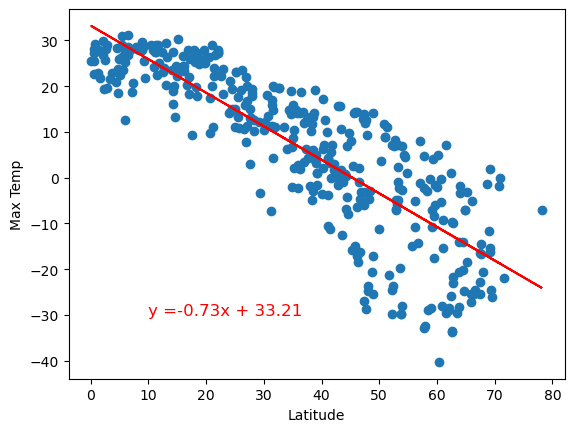

In [115]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.5181726390675181


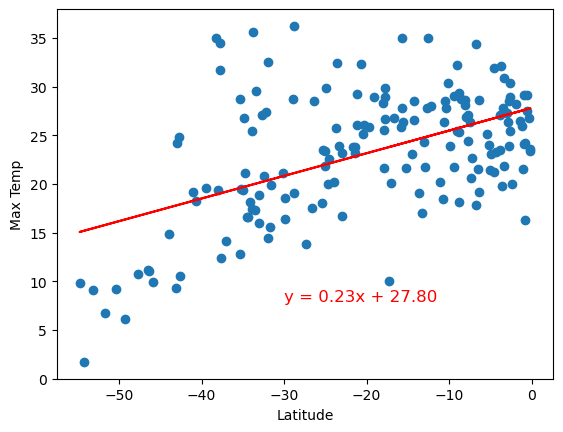

In [116]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 
Relationship between Temperature and Latitude:

There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.8422881332019456 on Northern Hemisphere.
There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.5181726390675181 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


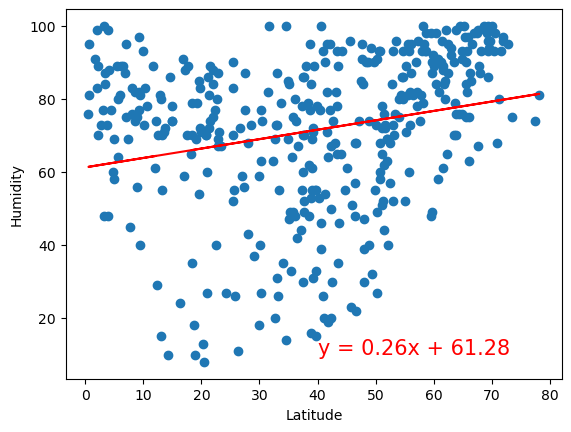

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.3027223271985031


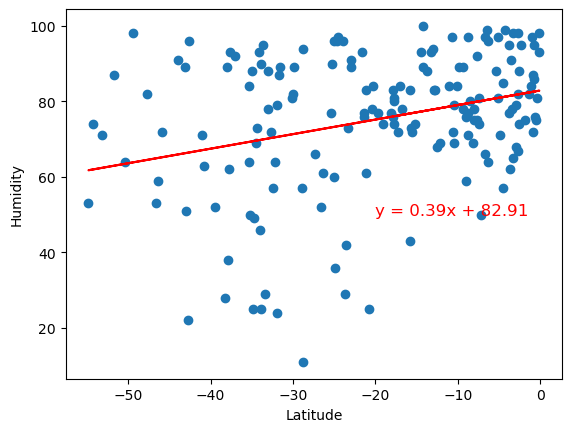

In [117]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Relationship between Humidity and Latitude:** 
There is a positive correlation between humidity and latitude with a correlation coefficient of 0.05689741545789598 on Northern Hemisphere.
There is a relatively strong positive correlation correlation between humidity and latitude with a correlation coefficient of 0.3027223271985031 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


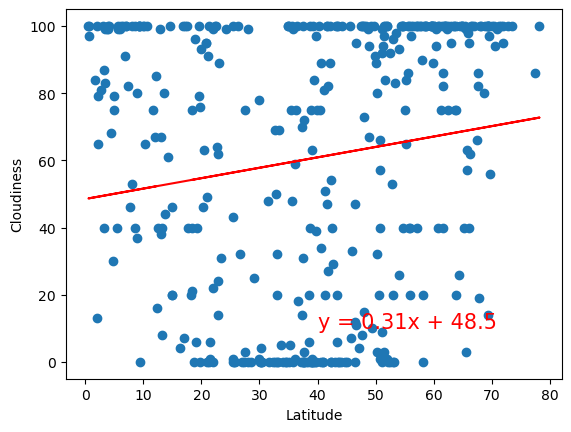

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.083353235093872


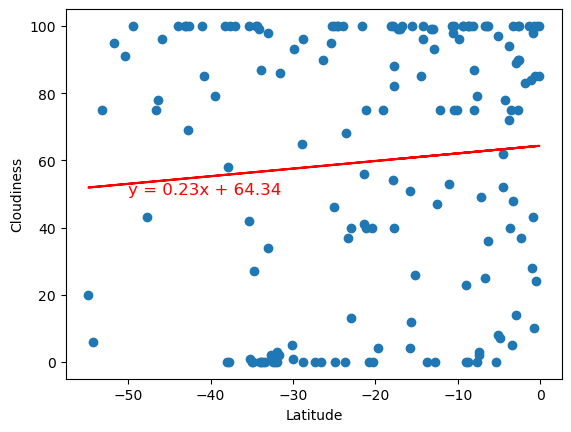

In [118]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Relationship between Cloudiness and Latitude:** 
There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.024026517125811015 on Northern Hemisphere.
There is a relatively strong positive correlation between cloudiness and latitude with a correlation coefficient of 0.083353235093872 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11669735051538535


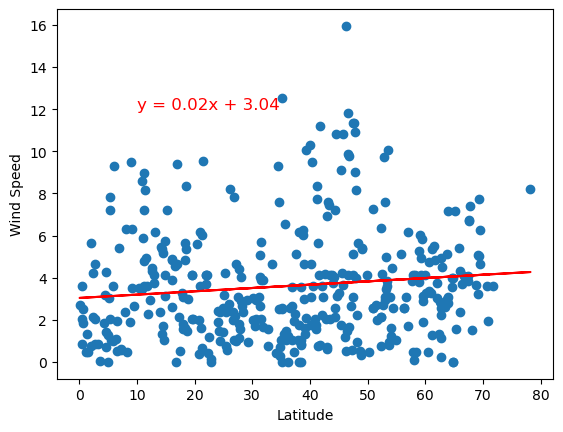

In [119]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.2381485789320884


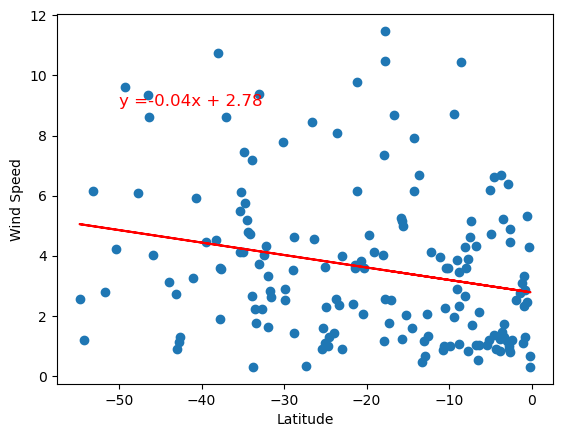

In [120]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Relationship between Wind Speed and Latitude:** 

There is a negligible to almost no correlation between wind speed and latitude with a correlation coefficient of 0.11669735051538535 on Northern Hemisphere.

There is a weak negative correlation between wind speed and latitude with a correlation coefficient of -0.2381485789320884 on Southern Hemisphere.